In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [3]:
df=pd.read_csv(r"../data/cardio_train.csv",  delimiter=';')
df.drop(['id'], axis = 1, inplace=True)
df['age'] = [int(age/365) for age in df['age']]

In [4]:
df.describe()
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
x = df[features]
y = df['cardio']

In [6]:
x = StandardScaler().fit_transform(x)

In [7]:
pca = PCA()
x_pca = pca.fit_transform(x)

In [8]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.176, 0.143, 0.103, 0.092, 0.090, 0.089, 0.085, 0.074, 0.057,
       0.049, 0.041])

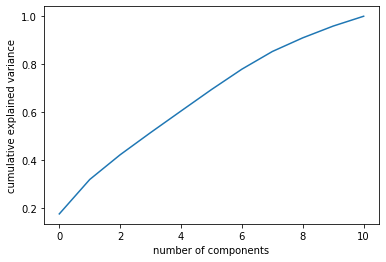

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
target_names = np.unique(y)

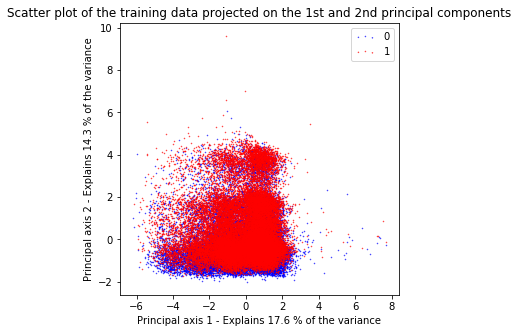

In [11]:
colors = ['blue', 'red']
plt.figure(1, figsize=(5, 5))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

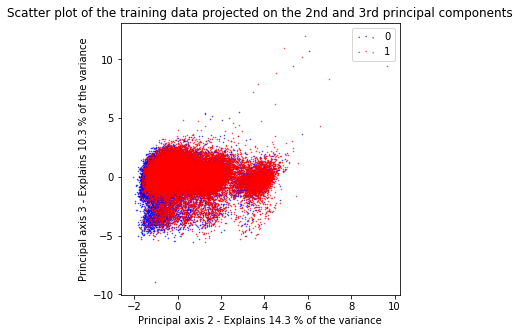

In [12]:
colors = ['blue', 'red']
plt.figure(1, figsize=(5, 5))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_pca[y == i, 1], x_pca[y == i, 2], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 2nd "
        "and 3rd principal components")
plt.xlabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))
plt.ylabel("Principal axis 3 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[2] * 100.0))

plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

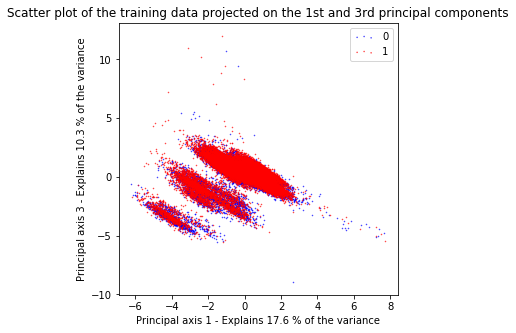

In [13]:
colors = ['blue', 'red']
plt.figure(1, figsize=(5, 5))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 2], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 3rd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 3 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[2] * 100.0))

plt.savefig('pca-porto-01.png', dpi=150)
plt.show()